In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import os 
import warnings
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pylab import rcParams

%matplotlib inline


from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import xgboost as xgb

import lightgbm as lgb
import sklearn

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import train_test_split


import warnings

Using TensorFlow backend.


# EDA

In [2]:
#data = pd.read_csv('D:/FV_raw/S01_total_rev.csv')
data = pd.read_csv('C:\\Users\\\koreaw\\비즈니스어낼리틱스\\BA_data\\S01_data_rev_1.csv')
print(data.shape)

(53692, 94)


In [3]:
var = data.drop(['L0t','Class','S_NO','D_ID','FV89','FV90'], axis=1)
target = data['Class']

min_max_scaler = MinMaxScaler()
data2_norm=min_max_scaler.fit_transform(var)
data2_norm = pd.DataFrame(data2_norm)
data_norm = data2_norm.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Class
0,0.704672,0.613381,0.602628,0.3787,0.0,0.613485,0.826649,0.826649,0.6131,0.0,...,0.085121,0.036100,0.088404,0.135428,0.0328,0.7236,0.00000,0.000000,0.5,17
1,0.276039,0.489615,0.488530,0.7500,0.0,0.489699,0.556513,0.556513,0.3868,0.0,...,0.099081,0.023713,0.078263,0.139745,0.0347,0.7902,0.00000,0.003934,1.0,21
2,0.180883,0.376915,0.429988,0.7500,0.0,0.376979,0.512430,0.396420,0.3868,0.0,...,0.115764,0.156609,0.222002,0.141652,0.1174,0.2804,0.01976,0.023164,1.0,9
3,0.227390,0.416411,0.446834,0.7901,0.0,0.416482,0.512430,0.460225,0.3868,0.0,...,0.090398,0.067953,0.152116,0.118261,0.0518,0.6053,0.00000,0.002404,1.0,21
4,0.161380,0.365169,0.429988,0.6875,0.0,0.365231,0.460225,0.460225,0.3868,0.0,...,0.009193,0.017342,0.024471,0.115149,0.0054,0.9704,0.00000,0.000000,0.5,9


In [4]:
pca = PCA(n_components=0.95) #95%이상의 분산을 설명력을 갖는 차원축소
new_data2 = pca.fit_transform(data2_norm)
data2_norm2 = pd.DataFrame(new_data2)
data_norm = data2_norm2.merge(target.to_frame(),left_index=True, right_index = True)
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9


## Class 7개, 최종 데이터 셋 

In [5]:
def func(data_norm) :
    if data_norm['Class'] == 9 or data_norm['Class'] == 21 or data_norm['Class'] == 17 \
    or data_norm['Class'] == 16 or data_norm['Class'] == 198 or data_norm['Class'] == 76 \
    or data_norm['Class'] == 22 :
        return data_norm['Class']
    else : return 200
data_norm['ClassA'] = data_norm.apply(func, axis = 1)
data_norm1 = data_norm[data_norm['ClassA'] != 200]

data_norm1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class,ClassA
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17,17.0
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21,21.0
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9,9.0
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21,21.0
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9,9.0


## AdaBoost

### 9 vs all

In [6]:
def func(data_norm1) :
    if data_norm1['Class'] == 9 : return 0
    else : return 1
data_norm1['ClassA'] = data_norm1.apply(func, axis = 1)

C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
data_norm1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Class,ClassA
0,0.130768,-1.038052,0.697290,0.165806,0.487045,0.896660,-0.127558,0.114706,0.154536,0.349317,0.264798,0.195927,0.076353,0.145501,-0.127520,-0.110704,0.127078,0.020761,17,1
1,-0.249376,-0.617195,-0.025617,-0.003057,-0.323223,-0.159566,-0.084079,0.192891,0.120966,0.012226,-0.033878,-0.075836,0.219057,0.133422,0.037402,-0.105950,0.002519,0.057020,21,1
2,-0.269553,-0.492975,-0.262176,-0.183749,-0.594876,0.122842,-0.117533,0.290239,-0.408543,-0.068274,-0.084349,-0.002861,-0.122769,0.042745,-0.005036,0.147850,-0.101937,-0.093063,9,0
3,-0.399706,-0.494862,-0.085869,-0.167540,0.414870,0.053105,-0.380552,0.034769,-0.154443,-0.006329,-0.109446,0.142629,-0.130427,0.049213,0.018222,-0.025605,-0.074968,-0.057281,21,1
4,-0.791584,-0.367674,-0.300121,0.297141,0.648399,0.088933,0.139348,-0.035591,0.070308,-0.099122,-0.016146,-0.236745,-0.078888,0.190031,0.224928,-0.088945,0.091973,-0.054262,9,0


In [9]:
X= data_norm1.drop(['Class','ClassA'], axis=1)
y= data_norm1['ClassA']

train, test = train_test_split(data_norm1, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)


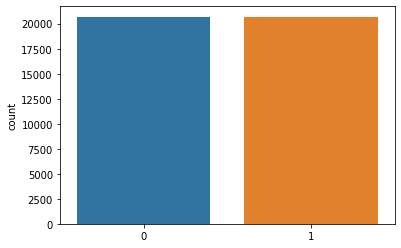

In [10]:
smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

In [11]:
x_test=x_test.values
y_test=y_test.values

In [12]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train_sm, y_train_sm)

y_pred = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7981359399863606

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      8877
           1       0.66      0.80      0.72      4320

    accuracy                           0.80     13197
   macro avg       0.77      0.80      0.78     13197
weighted avg       0.81      0.80      0.80     13197



In [14]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(x_train_sm, y_train_sm)
train_model2 = model2.fit(x_train_sm, y_train_sm)


pred1 = train_model1.predict(x_test)
pred2 = train_model2.predict(x_test)

In [19]:
print(classification_report(y_test, pred1))
print("------------------------------------------")
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      8858
           1       0.72      0.81      0.76      4339

    accuracy                           0.83     13197
   macro avg       0.81      0.83      0.82     13197
weighted avg       0.84      0.83      0.84     13197

------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      8858
           1       0.76      0.81      0.79      4339

    accuracy                           0.85     13197
   macro avg       0.83      0.84      0.84     13197
weighted avg       0.86      0.85      0.86     13197



## Class 21 vs all

In [12]:
data_norm2 = data_norm1[data_norm1['ClassA']==1]

def func(data_norm2) :
    if data_norm2['Class'] == 21 : return 0
    else : return 1
data_norm2['ClassA'] = data_norm2.apply(func, axis = 1)

train, test = train_test_split(data_norm2, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)
x_train_ros, y_train_ros = ros.fit_sample(x_train, y_train)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)


# sns.countplot(y_train_sm)
# plt.show()

x_test=x_test.values
y_test=y_test.values

C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train, y_train)

y_pred = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.8478964401294499

In [16]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train_sm, y_train_sm)

y_pred2 = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred2)


0.7831715210355987

In [17]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train_ros, y_train_ros)

y_pred3 = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred3)


0.7746185852981969

In [11]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.53      0.60       948
           1       0.88      0.94      0.91      3378

    accuracy                           0.85      4326
   macro avg       0.79      0.73      0.76      4326
weighted avg       0.84      0.85      0.84      4326



In [18]:
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.52      0.73      0.61      1002
           1       0.91      0.80      0.85      3324

    accuracy                           0.78      4326
   macro avg       0.72      0.76      0.73      4326
weighted avg       0.82      0.78      0.79      4326



In [19]:
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.51      0.76      0.61      1002
           1       0.92      0.78      0.84      3324

    accuracy                           0.77      4326
   macro avg       0.71      0.77      0.73      4326
weighted avg       0.82      0.77      0.79      4326



In [20]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(x_train_sm, y_train_sm)
train_model2 = model2.fit(x_train_sm, y_train_sm)


pred1 = train_model1.predict(x_test)
pred2 = train_model2.predict(x_test)

In [21]:
print(classification_report(y_test, pred1))
print("------------------------------------------")
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67      1002
           1       0.92      0.85      0.88      3324

    accuracy                           0.83      4326
   macro avg       0.76      0.80      0.78      4326
weighted avg       0.85      0.83      0.83      4326

------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1002
           1       0.91      0.90      0.90      3324

    accuracy                           0.85      4326
   macro avg       0.79      0.80      0.80      4326
weighted avg       0.86      0.85      0.85      4326



## class 17 vs all

C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


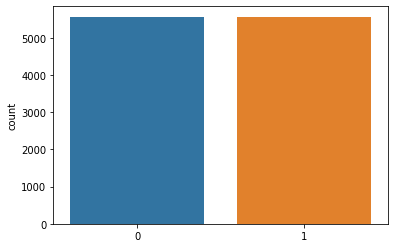

In [22]:
data_norm3 = data_norm2[data_norm2['ClassA']==1]

def func(data_norm3) :
    if data_norm3['Class'] == 17 : return 0
    else : return 1
data_norm3['ClassA'] = data_norm3.apply(func, axis = 1)

train, test = train_test_split(data_norm3, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values


In [23]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train_sm, y_train_sm)

y_pred = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.6617997616209773

In [24]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.66      0.52       938
           1       0.83      0.66      0.74      2418

    accuracy                           0.66      3356
   macro avg       0.63      0.66      0.63      3356
weighted avg       0.72      0.66      0.68      3356



In [25]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(x_train_sm, y_train_sm)
train_model2 = model2.fit(x_train_sm, y_train_sm)


pred1 = train_model1.predict(x_test)
pred2 = train_model2.predict(x_test)

In [26]:
print(classification_report(y_test, pred1))
print("------------------------------------------")
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.47      0.74      0.57       938
           1       0.87      0.67      0.76      2418

    accuracy                           0.69      3356
   macro avg       0.67      0.71      0.67      3356
weighted avg       0.76      0.69      0.71      3356

------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.64      0.58       938
           1       0.85      0.77      0.81      2418

    accuracy                           0.74      3356
   macro avg       0.69      0.71      0.69      3356
weighted avg       0.76      0.74      0.74      3356



## class 16 vs all

C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


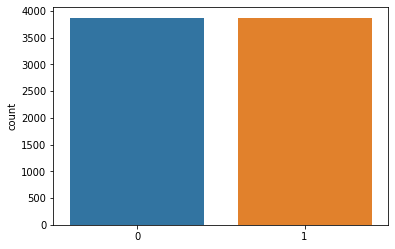

In [27]:
data_norm4 = data_norm3[data_norm3['ClassA']==1]

def func(data_norm4) :
    if data_norm4['Class'] == 16 : return 0
    else : return 1
data_norm4['ClassA'] = data_norm4.apply(func, axis = 1)

train, test = train_test_split(data_norm4, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values



In [28]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train_sm, y_train_sm)

y_pred = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.7356130108423686

In [29]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.75      0.63       721
           1       0.87      0.73      0.79      1677

    accuracy                           0.74      2398
   macro avg       0.71      0.74      0.71      2398
weighted avg       0.77      0.74      0.75      2398



In [30]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(x_train_sm, y_train_sm)
train_model2 = model2.fit(x_train_sm, y_train_sm)


pred1 = train_model1.predict(x_test)
pred2 = train_model2.predict(x_test)

In [31]:
print(classification_report(y_test, pred1))
print("------------------------------------------")
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.56      0.81      0.66       721
           1       0.90      0.73      0.80      1677

    accuracy                           0.75      2398
   macro avg       0.73      0.77      0.73      2398
weighted avg       0.80      0.75      0.76      2398

------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       721
           1       0.87      0.83      0.85      1677

    accuracy                           0.79      2398
   macro avg       0.76      0.77      0.76      2398
weighted avg       0.80      0.79      0.80      2398



## Class 198 vs all

C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


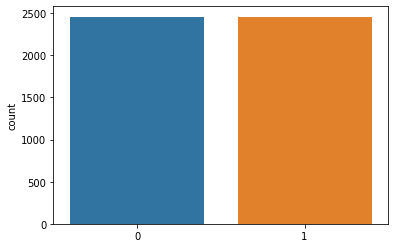

In [32]:
data_norm5 = data_norm4[data_norm4['ClassA']==1]

def func(data_norm5) :
    if data_norm5['Class'] == 198 : return 0
    else : return 1
data_norm5['ClassA'] = data_norm5.apply(func, axis = 1)

train, test = train_test_split(data_norm5, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values


In [33]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train_sm, y_train_sm)

y_pred = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)



0.9861861861861861

In [34]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       622
           1       0.99      0.99      0.99      1043

    accuracy                           0.99      1665
   macro avg       0.99      0.99      0.99      1665
weighted avg       0.99      0.99      0.99      1665



In [35]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(x_train_sm, y_train_sm)
train_model2 = model2.fit(x_train_sm, y_train_sm)


pred1 = train_model1.predict(x_test)
pred2 = train_model2.predict(x_test)

In [36]:
print(classification_report(y_test, pred1))
print("------------------------------------------")
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       622
           1       0.99      0.99      0.99      1043

    accuracy                           0.99      1665
   macro avg       0.99      0.99      0.99      1665
weighted avg       0.99      0.99      0.99      1665

------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       622
           1       0.99      0.99      0.99      1043

    accuracy                           0.99      1665
   macro avg       0.99      0.99      0.99      1665
weighted avg       0.99      0.99      0.99      1665



C:\ProgramData\Anaconda3\envs\tf_2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


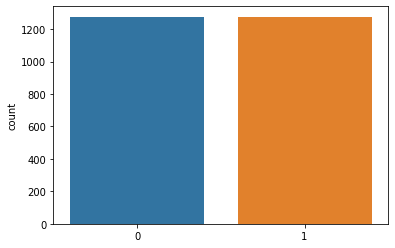

In [37]:
data_norm6 = data_norm5[data_norm5['ClassA']==1]

def func(data_norm6) :
    if data_norm6['Class'] == 76 : return 0
    else : return 1
data_norm6['ClassA'] = data_norm6.apply(func, axis = 1)

train, test = train_test_split(data_norm6, test_size = 0.3)
x_train = train.drop(['Class','ClassA'], axis=1)
y_train = train['ClassA']
x_test = test.drop(['Class','ClassA'], axis=1)
y_test = test['ClassA']

train2=train.drop('Class',axis=1)

smote = SMOTE(random_state=42,ratio='minority')
x_train_sm, y_train_sm = smote.fit_sample(x_train, y_train)

sns.countplot(y_train_sm)
plt.show()

x_test=x_test.values
y_test=y_test.values



In [38]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train_sm, y_train_sm)

y_pred = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.8725023786869648

In [39]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       532
           1       0.87      0.88      0.87       519

    accuracy                           0.87      1051
   macro avg       0.87      0.87      0.87      1051
weighted avg       0.87      0.87      0.87      1051



In [40]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(x_train_sm, y_train_sm)
train_model2 = model2.fit(x_train_sm, y_train_sm)


pred1 = train_model1.predict(x_test)
pred2 = train_model2.predict(x_test)

In [42]:
print(classification_report(y_test, pred1))
print("------------------------------------------")
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       532
           1       0.89      0.89      0.89       519

    accuracy                           0.89      1051
   macro avg       0.89      0.89      0.89      1051
weighted avg       0.89      0.89      0.89      1051

------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       532
           1       0.89      0.89      0.89       519

    accuracy                           0.89      1051
   macro avg       0.89      0.89      0.89      1051
weighted avg       0.89      0.89      0.89      1051

